# Redis

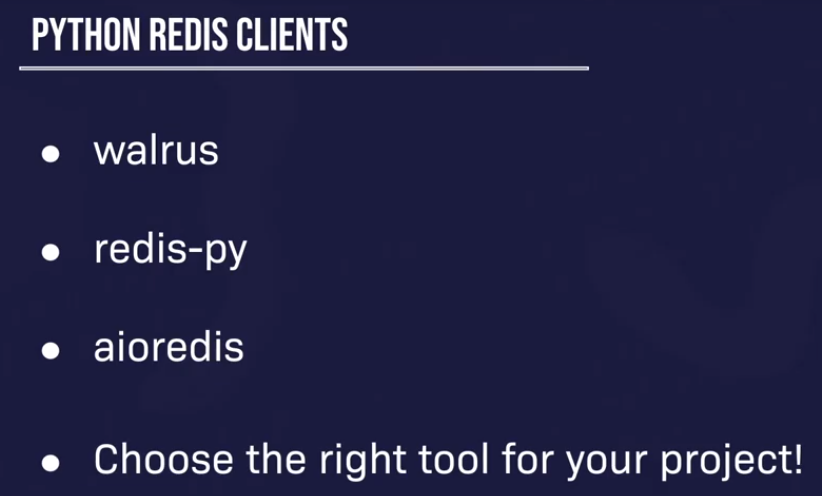

### Note: Use aioredis for async programming

In [4]:
!pip install redis

  Using cached redis-4.0.2-py3-none-any.whl (119 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)


In [13]:
%env SUBSCRIPTION_ID=
%env REDIS_HOST=
%env REDIS_PORT=12755
%env REDIS_USER=development
%env REDIS_PASSWORD=
%env REDIS_ADMIN_USER_PASSWORD=
%env REDIS_DB_NAME=python-cache

env: SUBSCRIPTION_ID=redis-subscription
env: REDIS_HOST=redis-12755.c277.us-east-1-3.ec2.cloud.redislabs.com
env: REDIS_PORT=12755
env: REDIS_USER=development
env: REDIS_PASSWORD=ETUd94rhsW@QbUB
env: REDIS_ADMIN_USER_PASSWORD=yGyeH4QnDcHykSXAONt1HYcvrhtDcnL1
env: REDIS_DB_NAME=python-cache


## Libraries

In [43]:
# standard
import os

# redis
import redis as redis_client

### Connection

In [44]:
HOST = os.environ.get('REDIS_HOST')
PORT = os.environ.get('REDIS_PORT')
USER = os.environ.get('REDIS_USER')
PASSWORD = os.environ.get('REDIS_PASSWORD')

In [45]:
def get_redis_connection(hostname=HOST, port=PORT, username=USER, password=PASSWORD):
    client_kwargs = {
        "client_name": "MyClient",
        "host": hostname,
        "port": port,
        "decode_responses": True
    }
    if username:
        client_kwargs["username"] = username
    if password:
        client_kwargs["password"] = password

    return redis_client.Redis(**client_kwargs)

In [46]:
redis = get_redis_connection()

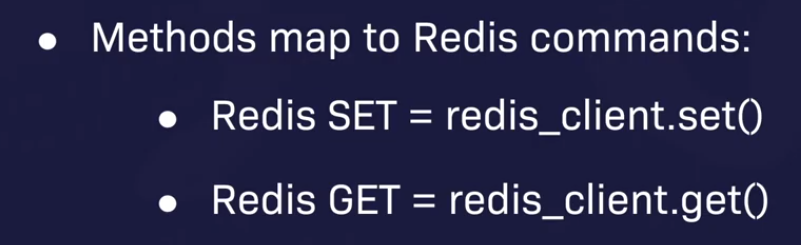

In [47]:
redis

Redis<ConnectionPool<Connection<host=redis-12755.c277.us-east-1-3.ec2.cloud.redislabs.com,port=12755,db=0,client_name=MyClient>>>

# Strings

### SET: insert an item of string type

In [50]:
redis.set('foo', 'bar')

True

### GET: retrieve an item of string type

In [51]:
redis.get('foo')

'1.5'

# Lists

In [ ]:
my_list_key = 'my_list'
my_list = ['item_1', 'item_2', 'item_3']

### RPUSH: insert a list

In [28]:
# pass unpacked list items to redis client
redis.rpush(my_list_key, *my_list_items)

item_1 item_2 item_3


3

### LRANGE: retrieve elements from a list

In [30]:
first_index = 0
last_index = -1
redis.lrange(my_list_key, first_index, last_index)

['item_1', 'item_2', 'item_3']

### LLEN: Check the length of a list

In [31]:
redis.llen(my_list_key)

3

# Sets

In [52]:
my_set_key = 'my_set'
my_set = {'set_item_1', 'set_item_1', 'set_item_2', 'set_item_3'}

In [53]:
redis.sadd(my_set_key, *my_set)

3

### SMEMBERS: Retrieve Set elements

In [56]:
redis.smembers(my_set_key)

{'set_item_1', 'set_item_2', 'set_item_3'}

### SSCAN: Retrieve elements

In [64]:
# https://redis-py.readthedocs.io/en/latest/_modules/redis/commands/core.html?highlight=sscan#
[i for i in redis.sscan_iter(my_set_key, count=2)]

['set_item_2', 'set_item_1', 'set_item_3']

### SCARD: Return the cardinality of a set

In [35]:
# for large sets you should use SSCAN over SCARD.
redis.scard(my_set_key)

3

# Hash/Dictionaries

In [65]:
my_dict_key = 'my_dict_key'
my_dict = {
    'key_a': 'value_a',
    'key_b': 'value_b',
    'key_c': 'value_c'
}

### HSET

In [39]:
redis.hset(my_dict_key, mapping=my_dict)

3

In [41]:
redis.hget(my_dict_key, 'key_a')

'value_a'

### ZADD (sorted set)

In [95]:
my_dict = {
    'key_a': 10,
    'key_b': 1.5,
    'key_a': 1.7,
    'key_d': 2
}
redis.zadd(my_dict_key, my_dict)

3

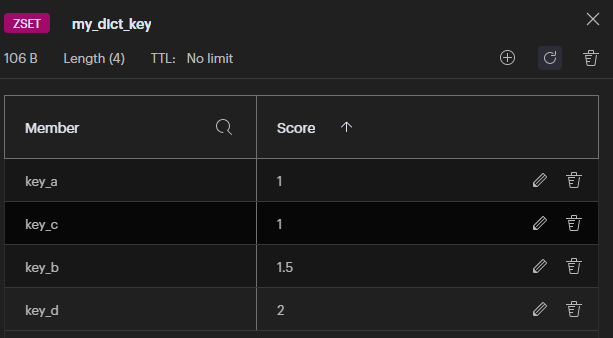

In [96]:
redis.zrange(my_dict_key, 0, -1)

['key_b', 'key_a', 'key_d']

In [98]:
redis.zscore(my_dict_key, 'key_a')

1.7

# Celery

In [8]:
# check current keys stored
redis.keys()

['_kombu.binding.celery',
 'my_list',
 'celery-task-meta-22a581c3-4f18-458f-b340-db3da1d88005',
 'celery-task-meta-7811a784-f2f0-4755-8b8d-90fe55d3216a',
 'celery-task-meta-5c128322-6bcb-44aa-954f-1aef4dda3f4e',
 'celery-task-meta-d1eb0766-2411-403f-b947-e108b864cc40',
 'celery-task-meta-0920592b-e7d2-484b-9783-16e990363f3a',
 'celery-task-meta-85c17df2-13d7-4b53-8493-e3728d4f8c56',
 'celery-task-meta-15ab61fe-4739-4862-8ae0-0ca1b34d88f5',
 'my_set',
 'celery-task-meta-a5afd2df-ed47-464a-9d99-3f6e79d878e1',
 'celery-task-meta-1afe7f38-4abc-49a1-a20b-a07f3f4deaf3',
 'celery-task-meta-c606f588-5161-41ad-a7c5-705b7fa9b0de',
 'celery-task-meta-c9815a55-3e63-4abd-9f60-a9341d575dec',
 'celery-task-meta-cfd151af-222f-4f2a-b6bb-9aee45a030b2',
 'foo',
 'celery-task-meta-550ce6ae-7c66-4ff1-a593-064672523dc6',
 'celery-task-meta-86990036-5bc3-4b18-93b2-f8b63f400085',
 'celery-task-meta-5d51fdb6-0be2-48fb-902c-04fed1045b90',
 'celery-task-meta-7ae89cb4-f6cd-4484-9e5e-fb3f42cf84dd',
 'my_dict_key',

### Celery task

In [15]:
redis.type('celery-task-meta-22a581c3-4f18-458f-b340-db3da1d88005')

'string'

In [14]:
redis.get('celery-task-meta-22a581c3-4f18-458f-b340-db3da1d88005')

'{"status": "FAILURE", "result": {"exc_type": "NotRegistered", "exc_message": ["tasks.add"], "exc_module": "celery.exceptions"}, "traceback": null, "children": [], "date_done": "2021-11-15T23:32:23.538720", "task_id": "22a581c3-4f18-458f-b340-db3da1d88005"}'

### Flushdb: delete all keys in the current database

In [16]:
redis.flushdb()

True

In [17]:
redis.keys()

[]